<a href="https://colab.research.google.com/github/Yen617/DL/blob/main/Naive_Method(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
def naive_forecast(data):
  forecasts = []
  for i in range(len(data)):
    if i == 0:
      forecast = data[i]
    else:
      forecast = data[i-1]
    forecasts.append(forecast)
  return forecasts

In [49]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Titanic_demo_1.csv')
# Colab
data = pd.read_csv('/content/drive/MyDrive/EURUSD - EURUSD (1).csv')
data

,Y,predict
0,1.178550,NaN
1,1.179523,1.178550
2,1.178398,1.179523
3,1.177413,1.178398
4,1.174826,1.177413
...,...,...
1291,1.082275,1.077540
1292,1.081105,1.082275
1293,1.076971,1.081105
1294,1.075732,1.076971


In [50]:
column_to_predict = 'Y'
data_to_predict = data[column_to_predict].values

In [51]:
forecasted_values = naive_forecast(data_to_predict)

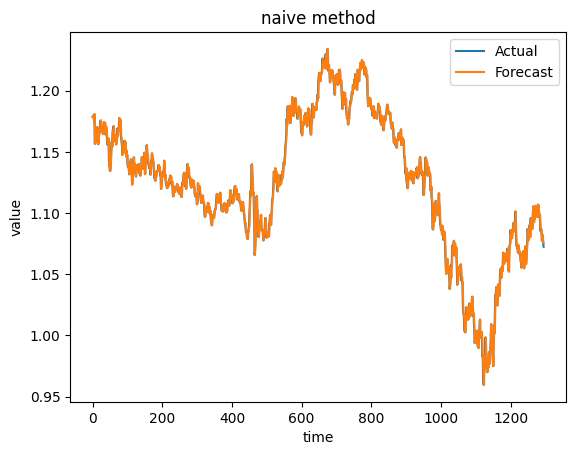

In [52]:
plt.plot(data_to_predict, label='Actual')
plt.plot(forecasted_values, label='Forecast')
plt.xlabel('time')
plt.ylabel('value')
plt.title('naive method')
plt.legend()
plt.show()

In [69]:
import csv
import numpy as np

data_float = []
with open('/content/drive/MyDrive/EURUSD - EURUSD (1).csv', 'r') as file:
    reader = csv.reader(file)

    for row in reader:
        if len(row) == 2:
            try:
                value1 = float(row[0])
                value2 = float(row[1])
                data_float.append([value1, value2])
            except ValueError:
                continue
            
for row in data_float:
    print(row)

[1.179523, 1.17855]
[1.178398, 1.179523]
[1.177413, 1.178398]
[1.174826, 1.177413]
[1.180777, 1.174826]
[1.156658, 1.180777]
[1.159595, 1.156658]
[1.163075, 1.159595]
[1.158856, 1.163075]
[1.157903, 1.158856]
[1.160578, 1.157903]
[1.16614, 1.160578]
[1.170275, 1.16614]
[1.165026, 1.170275]
[1.156363, 1.165026]
[1.156297, 1.156363]
[1.167856, 1.156297]
[1.164212, 1.167856]
[1.165922, 1.164212]
[1.166235, 1.165922]
[1.169591, 1.166235]
[1.175226, 1.169591]
[1.175696, 1.175226]
[1.172704, 1.175696]
[1.167679, 1.172704]
[1.166589, 1.167679]
[1.16791, 1.166589]
[1.170946, 1.16791]
[1.165325, 1.170946]
[1.164565, 1.165325]
[1.165515, 1.164565]
[1.174191, 1.165515]
[1.169413, 1.174191]
[1.168552, 1.169413]
[1.17375, 1.168552]
[1.164293, 1.17375]
[1.166045, 1.164293]
[1.170741, 1.166045]
[1.168962, 1.170741]
[1.166589, 1.168962]
[1.158601, 1.166589]
[1.15623, 1.158601]
[1.155802, 1.15623]
[1.160295, 1.155802]
[1.161076, 1.160295]
[1.152392, 1.161076]
[1.139471, 1.152392]
[1.140251, 1.139471]
[

In [120]:
def MAE_calculate(actual, predict):
  n = len(actual)
    
  if n == 0:
      raise ValueError("actual and predict arrays should not be empty.")
    
  error_sum = sum(abs(actual[i] - predict[i]) for i in range(n))
  MAE = error_sum / n
  return MAE

def MSE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  MSE = np.mean((actual - predict) ** 2)
  return MSE

def RMSE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  squared_errors = (actual - predict) ** 2
  RMSE = np.sqrt(np.mean(squared_errors))
  return RMSE

def MAPE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  ape = np.abs((actual - predict) / actual)
  ape[np.isinf(ape)] = 0.0  # 处理分母为0的情况
  ape[np.isnan(ape)] = 0.0  # 处理NaN值的情况
  MAPE = np.mean(ape) * 100
  return MAPE

def SMAPE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  ape = np.abs(actual - predict) / ((np.abs(actual) + np.abs(predict)) / 2)
  ape[np.isinf(ape)] = 0.0  # 处理分母为0的情况
  ape[np.isnan(ape)] = 0.0  # 处理NaN值的情况
  SMAPE = np.mean(ape) * 100
  return SMAPE

def RAE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  absolute_errors = np.abs(actual - predict)
  denominator = np.sum(np.abs(actual - np.mean(actual)))
  RAE = np.sum(absolute_errors/denominator)
  return RAE

def MRAE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  n=len(actual)
  absolute_errors = np.abs(actual - predict)
  denominator = np.sum(np.abs(actual - np.mean(actual)))
  RAE = np.sum(absolute_errors/denominator)
  #MRAE = np.mean(RAE)
  MRAE = RAE / n
  return MRAE

def MdRAE_calculate(actual, predict, bench=None):
  if bench==None:
    bench=np.mean(actual)
    MdRAE=np.median([abs(a - p) / abs(a - bench) for a, p in zip(actual, predict)])
    return MdRAE,bench
  else:
    MdRAE=np.median([abs(a - p) / abs(a - b) for a, p, b in zip(actual, predict, bench)])
    return MdRAE

def RSE_calculate(actual, predict, Root=False):
  actual = np.array(actual)
  predict = np.array(predict)
  mse = np.mean((actual - predict)**2)
  denominator = np.var(actual)
  RSE=mse/denominator
    
  if Root==True:
      return np.sqrt(RSE)
  else:
      return RSE

In [116]:
column1 = [row[0] for row in data_float]
column2 = [row[1] for row in data_float]

In [121]:
import numpy as np

MAE=MAE_calculate(column1, column2)
rounded_MAE = np.round(MAE, 3)
MSE=MSE_calculate(column1, column2)
rounded_MSE = np.round(MSE, 3)
RMSE=RMSE_calculate(column1, column2)
rounded_RMSE = np.round(RMSE, 3)
MAPE=MAPE_calculate(column1, column2)
rounded_MAPE = np.round(MAPE, 3)
SMAPE=SMAPE_calculate(column1, column2)
rounded_SMAPE = np.round(SMAPE, 3)
RAE=RAE_calculate(column1, column2)
rounded_RAE = np.round(RAE, 3)
MRAE=MRAE_calculate(column1, column2)
RSE=RSE_calculate(column1, column2, Root=False)
rounded_RSE = np.round(RSE, 3)
RRSE=RSE_calculate(column1, column2, Root=True)
rounded_RRSE = np.round(RRSE, 3)

print('MAE:', rounded_MAE)
print('MSE:', rounded_MSE)
print('RMSE:', rounded_RMSE)
print('MAPE:', rounded_MAPE,'%')
print('SMAPE:', rounded_SMAPE,'%')
print('RAE:', rounded_RAE)
print('MRAE:', MRAE)
result = MdRAE_calculate(column1, column2)
if isinstance(result, tuple):
    MdRAE = result[0]
    bench = result[1]
    print('MdRAE:', round(MdRAE, 3), 'bench:', round(bench, 3))
else:
    MdRAE = result
    print('MdRAE:', round(MdRAE, 3))
print('RSE:', rounded_RSE)
print('RRSE:', rounded_RRSE)

MAE: 0.004
MSE: 0.0
RMSE: 0.005
MAPE: 0.343 %
SMAPE: 0.343 %
RAE: 0.087
MRAE: 6.693304658382964e-05
MdRAE: 0.087 bench: 1.124
RSE: 0.008
RRSE: 0.09
